# **DELIVERABLE 1 - BMW**

This notebook aims to learn how to clean, transform, and visualize data. In this case, the dataset is from the BMW company, where we can observe different car models, features, registration dates, and sales dates.

## IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold

## LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_bmw=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Entregable1/bmw_pricing_v3.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DATA STRUCTURE

In [ ]:
df_bmw.shape

(4843, 18)

In [ ]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


We see that there are negative minimum kilometers, 0 horsepower, and a price of 100. These data are unreasonable for vehicle sales.

### Transform the columns of date type

In [ ]:
df_bmw['fecha_registro']=pd.to_datetime(df_bmw['fecha_registro'])
df_bmw['fecha_venta']=pd.to_datetime(df_bmw['fecha_venta'])

In [ ]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

We create a new column called ‘fecha_dif_anyo.’ It is a variable that indicates, in minutes, the difference between the sales date and the registration date, i.e., the age of the car at the time of sale

In [ ]:
df_bmw["fecha_dif_anyo"]=(df_bmw["fecha_venta"]-df_bmw["fecha_registro"])/np.timedelta64(1,'Y')

In [ ]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_dif_anyo
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,5.916617
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaN
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,5.837218
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaN
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaN


As the columns ‘fecha_registro’ and ‘fecha_venta’ contain null values, we impute 99 to those nulls to differentiate them.

In [ ]:
df_bmw['fecha_dif_anyo'].fillna(99, inplace=True)

In [ ]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_dif_anyo
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,5.916617
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,99.000000
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,5.837218
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,99.000000
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,99.000000


In [ ]:
del df_bmw['fecha_registro']
del df_bmw['fecha_venta']

In [ ]:
df_bmw.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_dif_anyo
0,NaN,118,140411.0,100.0,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,5.916617
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,99.000000
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,5.837218
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,99.000000
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,99.000000


## EDA

In [ ]:
# Visualization of a value_counts for categorical variables and a histogram for numerical variables
for i in df_bmw:
  if df_bmw[i].dtype.kind == "O":
    print(i,'\n', df_bmw[i].value_counts(), '\n')
  elif (df_bmw[i].dtype.kind=="f") or (df_bmw[i].dtype.kind=="i"):
    print(df_bmw.hist(i))

NameError: name 'df_bmw' is not defined

## DATA TRANSFORMATION

### DUPLICATE ANALYSIS

In [ ]:
df_bmw[df_bmw.duplicated(keep=False)]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_dif_anyo


### NULLS ANALYSIS

In [ ]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_dif_anyo                    0
dtype: int64

### Treatment of the different columns


In [ ]:
# Marca: let’s remove the column since it does not provide us with varied information
del df_bmw ['marca']

In [ ]:
# Modelo: we impute the mode to maintain the overall distribution of the variable
df_bmw["modelo"].fillna(df_bmw["modelo"].mode()[0], inplace=True)

In [ ]:
# Km: we impute the median since the distribution does not follow a Gaussian bell curve
df_bmw["km"].fillna(df_bmw["km"].median(), inplace=True)

In [ ]:
# Potencia: we impute the median since the distribution does not follow a Gaussian bell curve
df_bmw["potencia"].fillna(df_bmw["potencia"].median(), inplace=True)

In [ ]:
# Tipo_gasolina: we impute the mode to maintain the overall distribution of the variable
df_bmw['tipo_gasolina'].fillna(df_bmw['tipo_gasolina'].mode()[0], inplace=True)

In [ ]:
# Color: We create a new variable called ‘sin color’
df_bmw['color'].fillna('sin_color', inplace=True)

In [ ]:
# Tipo_coche: we impute 'sin_tipo'
df_bmw['tipo_coche'].fillna('sin_tipo', inplace=True)

In [ ]:
# Volante_regulable: we delete 4 nulls
df_bmw.dropna(subset=['volante_regulable'], inplace=True)

In [ ]:
# Aire_acondicionado: we impute the mode for ‘True’ since most people wear it
df_bmw['aire_acondicionado'].fillna(df_bmw['aire_acondicionado'].mode()[0], inplace=True)

In [ ]:
# Camara_trasera: we delete 2 nulls
df_bmw.dropna(subset=['camara_trasera'], inplace=True)

In [ ]:
# Asientos_traseros_plegables: we delete the column
del df_bmw['asientos_traseros_plegables']

In [ ]:
# Elevalunas_electricos: we delete 2 nulls
df_bmw.dropna(subset=['elevalunas_electrico'], inplace=True)

In [ ]:
# Bluetooth: we assign the most frequent value to null data based on the mode
df_bmw['bluetooth'].fillna(df_bmw['bluetooth'].mode()[0], inplace=True)

In [ ]:
# Alerta_lim_velocidad: we assign the most frequent value to null data based on the mode
df_bmw['alerta_lim_velocidad'].fillna(df_bmw['alerta_lim_velocidad'].mode()[0], inplace=True )


In [ ]:
# Precio: we remove null prices
df_bmw.dropna(subset=['precio'], inplace=True)

In [ ]:
df_bmw.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_dif_anyo          0
dtype: int64

In [ ]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4829 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4829 non-null   object 
 1   km                    4829 non-null   float64
 2   potencia              4829 non-null   float64
 3   tipo_gasolina         4829 non-null   object 
 4   color                 4829 non-null   object 
 5   tipo_coche            4829 non-null   object 
 6   volante_regulable     4829 non-null   object 
 7   aire_acondicionado    4829 non-null   bool   
 8   camara_trasera        4829 non-null   object 
 9   elevalunas_electrico  4829 non-null   object 
 10  bluetooth             4829 non-null   bool   
 11  gps                   4829 non-null   bool   
 12  alerta_lim_velocidad  4829 non-null   bool   
 13  precio                4829 non-null   float64
 14  fecha_dif_anyo        4829 non-null   float64
dtypes: bool(4), float64(4

In [ ]:
df_bmw_sin_nulos=df_bmw.copy()

### Univariate Analysis
We will examine those variables that may contain outliers, while ensuring that these data points make sense

#### KM

In [ ]:
print(df_bmw_sin_nulos['km'].min())
print(df_bmw_sin_nulos['km'].max())
print (df_bmw_sin_nulos['km'].mean())

-64.0
1000376.0
140938.9983433423


In [ ]:
## Km: Km is <0
df_bmw_sin_nulos[df_bmw_sin_nulos['km']<0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_dif_anyo
2938,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,99.0


In [ ]:
df_bmw_sin_nulos.drop(df_bmw_sin_nulos[df_bmw_sin_nulos['km']<0].index, inplace=True)

In [ ]:
df_bmw_sin_nulos[df_bmw_sin_nulos['km']>=1000376]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_dif_anyo
3732,118,1000376.0,90.0,diesel,sin_color,sin_tipo,True,False,False,False,False,True,False,1400.0,13.25147


In [ ]:
df_bmw_sin_nulos.drop(df_bmw_sin_nulos[df_bmw_sin_nulos['km']>=1000376].index, inplace=True)

#### Potencia

In [ ]:
print(df_bmw_sin_nulos['potencia'].min())
print(df_bmw_sin_nulos['potencia'].max())
print(df_bmw_sin_nulos['potencia'].mean())

0.0
423.0
128.9548373731096


In [ ]:
## Potencia: <=60
df_bmw_sin_nulos[df_bmw_sin_nulos["potencia"]<=60]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_dif_anyo
1796,i3,152328.0,25.0,hybrid_petrol,black,sin_tipo,False,True,False,False,False,True,True,20300.0,99.00000
1925,i3,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,15500.0,99.00000
3765,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,True,11700.0,3.41417


In [ ]:
## Potencia: we remove null data <=60
df_bmw_sin_nulos.drop(df_bmw_sin_nulos[df_bmw_sin_nulos["potencia"]<=60].index, inplace=True)

#### Tipo de gasolina

In [ ]:
df_bmw_sin_nulos['tipo_gasolina'].unique()

array(['diesel', 'petrol', 'hybrid_petrol', 'Diesel', 'electro'],
      dtype=object)

In [ ]:
## Tipo_gasolina: let’s change the categories to lowercase
df_bmw_sin_nulos['tipo_gasolina']=df_bmw_sin_nulos['tipo_gasolina'].str.lower()

In [ ]:
df_bmw_sin_nulos['tipo_gasolina'].unique()

array(['diesel', 'petrol', 'hybrid_petrol', 'electro'], dtype=object)

#### Precio

In [ ]:
print(df_bmw_sin_nulos['precio'].min())
print(df_bmw_sin_nulos['precio'].max())
print(df_bmw_sin_nulos['precio'].mean())

100.0
178500.0
15821.807628524046


In [ ]:
## Precio: <=200
df_bmw_sin_nulos[df_bmw_sin_nulos['precio']<=200]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_dif_anyo
565,320,179358.0,120.0,diesel,black,sin_tipo,False,True,False,False,False,True,True,100.0,4.747531
630,318,147558.0,105.0,diesel,white,estate,False,True,False,False,False,False,True,100.0,3.329295
879,318,134156.0,105.0,diesel,grey,estate,False,True,False,False,False,False,True,100.0,3.833070
1255,320,170381.0,135.0,diesel,silver,sin_tipo,True,True,False,False,False,True,False,100.0,99.000000
1832,116,174524.0,85.0,diesel,blue,hatchback,False,True,False,False,False,True,True,100.0,3.666057
2473,525,230578.0,85.0,diesel,sin_color,sedan,False,True,False,False,False,True,True,200.0,21.084622
2574,525,229880.0,85.0,diesel,black,sedan,False,True,False,False,False,True,False,200.0,21.084622
2611,525,230264.0,85.0,diesel,black,sedan,False,False,False,False,False,True,False,200.0,21.084622
2829,525,439060.0,105.0,diesel,silver,sin_tipo,False,False,True,False,False,True,False,100.0,99.000000
4356,X3,79685.0,190.0,diesel,black,suv,False,False,False,False,False,False,True,100.0,4.243756


In [ ]:
df_bmw_sin_nulos.drop(df_bmw_sin_nulos[df_bmw['precio']<=600].index, inplace=True)

<ipython-input-158-fe1881ddb598>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bmw_sin_nulos.drop(df_bmw_sin_nulos[df_bmw['precio']<=600].index, inplace=True)


#### Fecha dif anyo

In [ ]:
df_bmw_sin_nulos[df_bmw_sin_nulos['fecha_dif_anyo']<=0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_dif_anyo
100,320,342768.0,135.0,diesel,black,sin_tipo,False,True,False,True,False,True,True,8200.0,-1.667385
256,316,201102.0,85.0,diesel,black,estate,True,True,False,False,False,True,False,8800.0,-5.500455


In [ ]:
df_bmw_sin_nulos.drop(df_bmw_sin_nulos[df_bmw_sin_nulos['fecha_dif_anyo']<=0].index, inplace=True)

### To convert a boolean column to binary integer values

In [ ]:
columnas_bool = ['volante_regulable', 'aire_acondicionado', 'camara_trasera',
                 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']

for columna in columnas_bool:
    df_bmw_sin_nulos[f'{columna}_bool'] = df_bmw_sin_nulos[columna].replace({True: 1, False: 0}).astype('int8')


In [ ]:
columnas_a_eliminar = ['volante_regulable', 'aire_acondicionado', 'camara_trasera',
                        'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']

df_bmw_sin_nulos.drop(columnas_a_eliminar, axis=1, inplace=True)

In [ ]:
df_bmw2 = df_bmw_sin_nulos.reset_index(drop=True)

In [ ]:
df_bmw2

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,fecha_dif_anyo,volante_regulable_bool,aire_acondicionado_bool,camara_trasera_bool,elevalunas_electrico_bool,bluetooth_bool,gps_bool,alerta_lim_velocidad_bool
0,118,140411.0,100.0,diesel,black,sin_tipo,11300.0,5.916617,1,1,0,1,0,1,1
1,M4,13929.0,317.0,petrol,grey,convertible,69700.0,99.000000,1,1,0,0,1,1,1
2,320,183297.0,120.0,diesel,white,sin_tipo,10200.0,5.837218,0,0,0,1,0,1,0
3,420,128035.0,135.0,diesel,red,convertible,25100.0,99.000000,1,1,0,1,1,1,1
4,425,97097.0,160.0,diesel,silver,sin_tipo,33400.0,99.000000,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,218 Gran Tourer,39743.0,110.0,diesel,black,sin_tipo,14600.0,99.000000,0,1,0,0,0,1,0
4800,218 Active Tourer,49832.0,100.0,diesel,grey,sin_tipo,17500.0,3.167758,0,1,0,0,0,1,1
4801,218 Gran Tourer,19633.0,110.0,diesel,grey,van,17000.0,2.918609,0,1,0,0,0,1,1
4802,218 Active Tourer,27920.0,110.0,diesel,brown,van,22700.0,2.417572,1,1,0,0,0,1,1


In [ ]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4804 non-null   object 
 1   km                         4804 non-null   float64
 2   potencia                   4804 non-null   float64
 3   tipo_gasolina              4804 non-null   object 
 4   color                      4804 non-null   object 
 5   tipo_coche                 4804 non-null   object 
 6   precio                     4804 non-null   float64
 7   fecha_dif_anyo             4804 non-null   float64
 8   volante_regulable_bool     4804 non-null   int8   
 9   aire_acondicionado_bool    4804 non-null   int8   
 10  camara_trasera_bool        4804 non-null   int8   
 11  elevalunas_electrico_bool  4804 non-null   int8   
 12  bluetooth_bool             4804 non-null   int8   
 13  gps_bool                   4804 non-null   int8 

### Correlation of features

In [ ]:
corr=df_bmw2.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-167-db5f4c903222>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_bmw2.corr()


,km,potencia,precio,fecha_dif_anyo,volante_regulable_bool,aire_acondicionado_bool,camara_trasera_bool,elevalunas_electrico_bool,bluetooth_bool,gps_bool,alerta_lim_velocidad_bool
km,1.000000,-0.042286,-0.410005,0.018265,0.073476,0.028424,0.004883,0.052374,-0.027652,0.157125,-0.029729
potencia,-0.042286,1.000000,0.639993,-0.016745,0.325615,0.179865,0.313306,0.341674,0.202501,0.007580,0.427566
precio,-0.410005,0.639993,1.000000,-0.033796,0.265212,0.221263,0.252218,0.261576,0.182798,-0.008458,0.386157
fecha_dif_anyo,0.018265,-0.016745,-0.033796,1.000000,0.002196,-0.037184,-0.000811,-0.006289,-0.009542,-0.020064,-0.023538
volante_regulable_bool,0.073476,0.325615,0.265212,0.002196,1.000000,0.286739,0.254029,0.277848,0.123863,0.243783,0.190321
aire_acondicionado_bool,0.028424,0.179865,0.221263,-0.037184,0.286739,1.000000,0.143191,0.259191,0.101758,0.346274,0.171171
camara_trasera_bool,0.004883,0.313306,0.252218,-0.000811,0.254029,0.143191,1.000000,0.198537,0.125812,0.061394,0.168229
elevalunas_electrico_bool,0.052374,0.341674,0.261576,-0.006289,0.277848,0.259191,0.198537,1.000000,0.231865,0.203024,0.298913
bluetooth_bool,-0.027652,0.202501,0.182798,-0.009542,0.123863,0.101758,0.125812,0.231865,1.000000,0.114891,0.075885
gps_bool,0.157125,0.007580,-0.008458,-0.020064,0.243783,0.346274,0.061394,0.203024,0.114891,1.000000,-0.050652


### Price distribution (target variable)

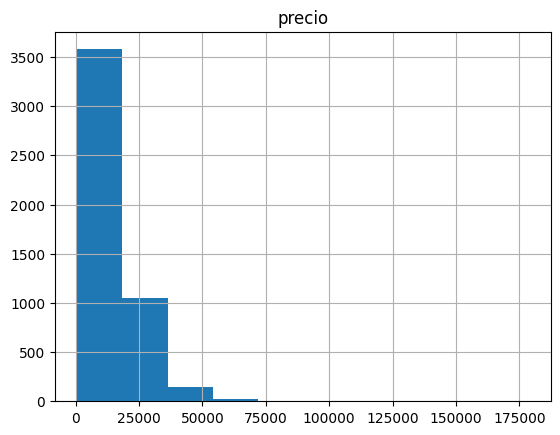

In [ ]:
df_bmw2.hist('precio');

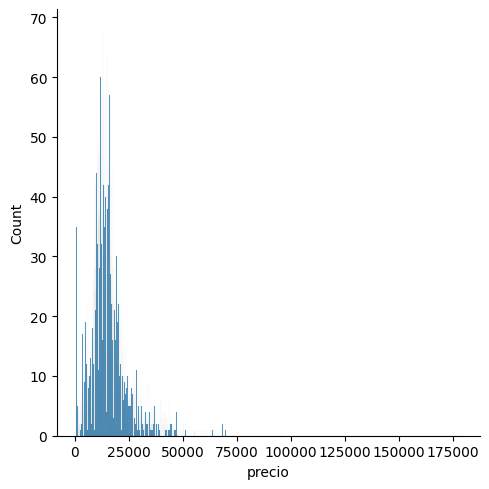

In [ ]:
sns.displot(df_bmw2, x='precio', binwidth=100)

<Axes: xlabel='precio'>

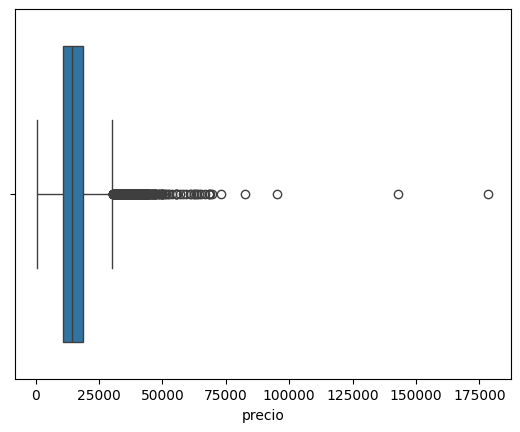

In [ ]:
sns.boxplot(x='precio', data=df_bmw2)

In [ ]:
## Hacemos un logarítmo para transformar el precio a una normal
df_bmw2["log_precio"]=np.log10(df_bmw2["precio"])

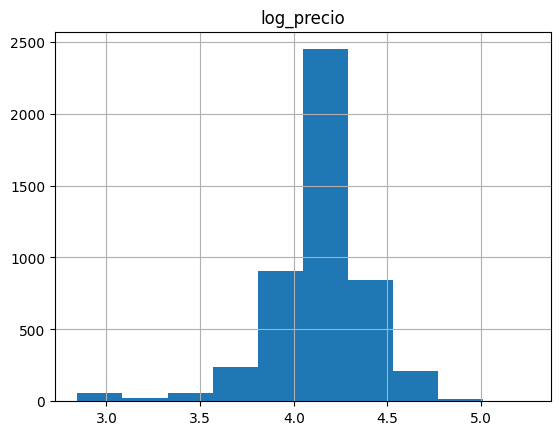

In [ ]:
df_bmw2.hist('log_precio');

<Axes: xlabel='log_precio'>

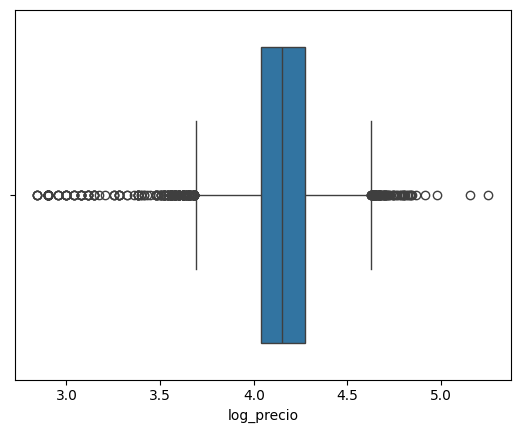

In [ ]:
sns.boxplot(x='log_precio', data=df_bmw2)

### To separate variables into lists based on their data type

In [ ]:
df_bmw3=df_bmw2.copy()

In [ ]:
df_bmw3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,fecha_dif_anyo,volante_regulable_bool,aire_acondicionado_bool,camara_trasera_bool,elevalunas_electrico_bool,bluetooth_bool,gps_bool,alerta_lim_velocidad_bool,log_precio
0,118,140411.0,100.0,diesel,black,sin_tipo,11300.0,5.916617,1,1,0,1,0,1,1,4.053078
1,M4,13929.0,317.0,petrol,grey,convertible,69700.0,99.000000,1,1,0,0,1,1,1,4.843233
2,320,183297.0,120.0,diesel,white,sin_tipo,10200.0,5.837218,0,0,0,1,0,1,0,4.008600
3,420,128035.0,135.0,diesel,red,convertible,25100.0,99.000000,1,1,0,1,1,1,1,4.399674
4,425,97097.0,160.0,diesel,silver,sin_tipo,33400.0,99.000000,1,1,0,0,1,1,1,4.523746


In [ ]:
target=['precio', 'log_precio']
def obtener_lista_variables(dataset):
    lnum=[]
    lbool=[]
    lcat=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lnum.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2  and i not in target:
              lbool.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lcat.append(i)

    return lnum, lbool, lcat

In [ ]:
lnum, lbool, lcat= obtener_lista_variables(df_bmw3)

In [ ]:
lnum

['km', 'potencia', 'fecha_dif_anyo']

In [ ]:
lbool

['volante_regulable_bool',
 'aire_acondicionado_bool',
 'camara_trasera_bool',
 'elevalunas_electrico_bool',
 'bluetooth_bool',
 'gps_bool',
 'alerta_lim_velocidad_bool']

In [ ]:
lcat

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

### The relationship between the target variable and independent variables:

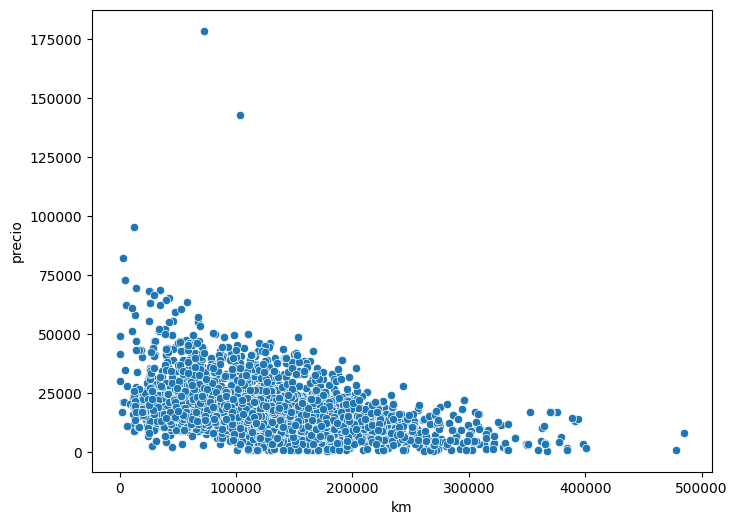

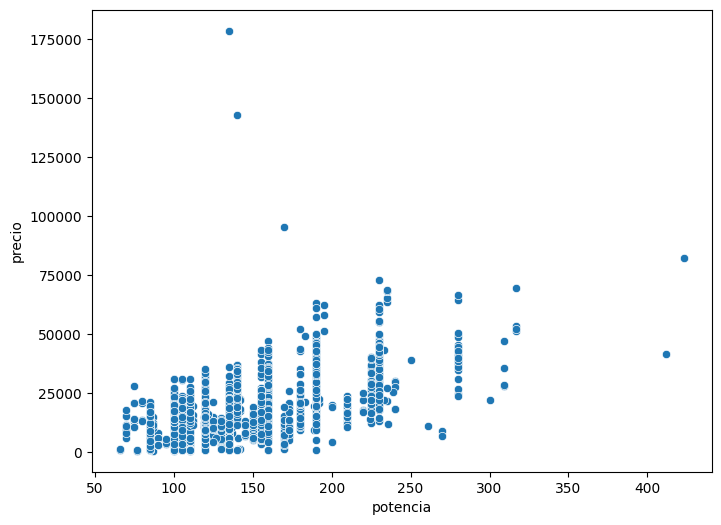

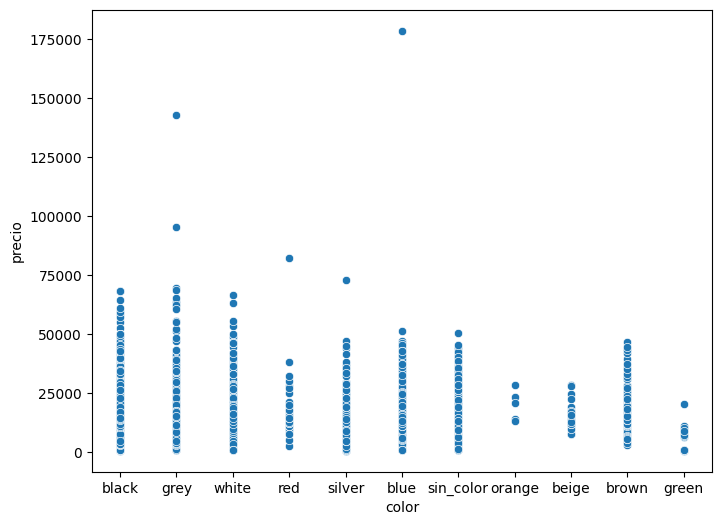

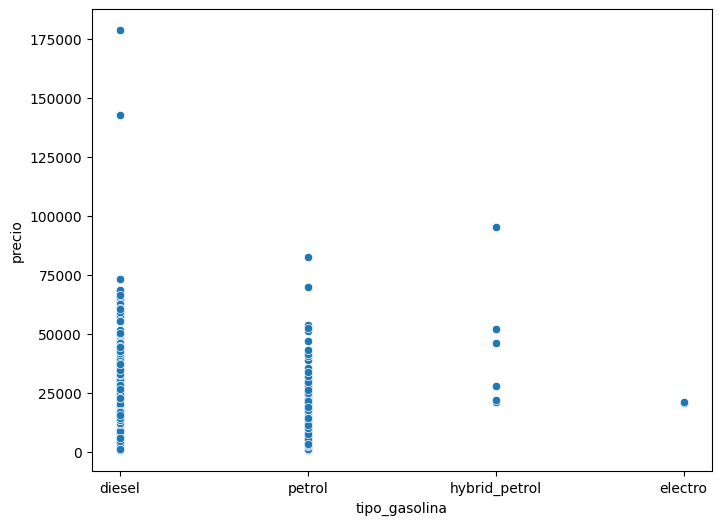

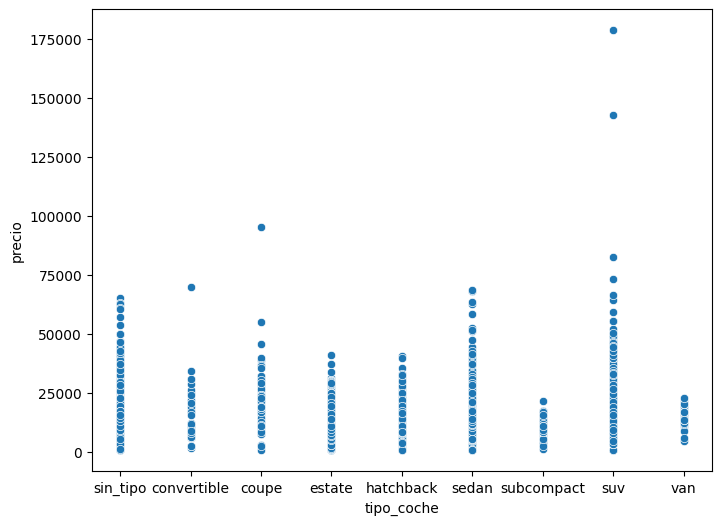

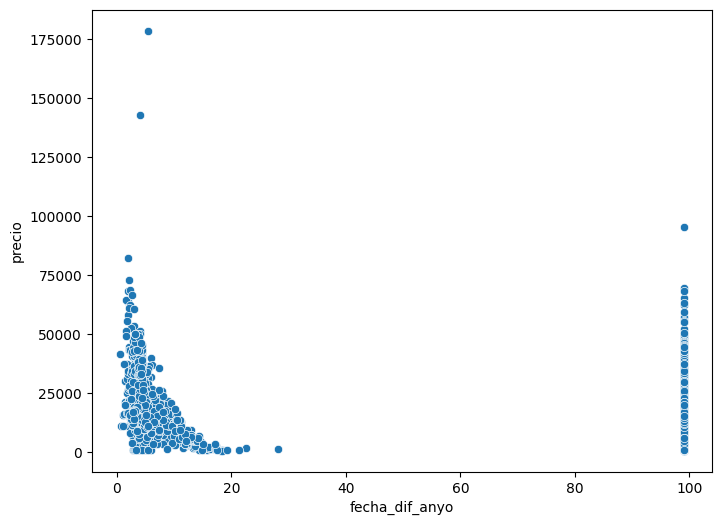

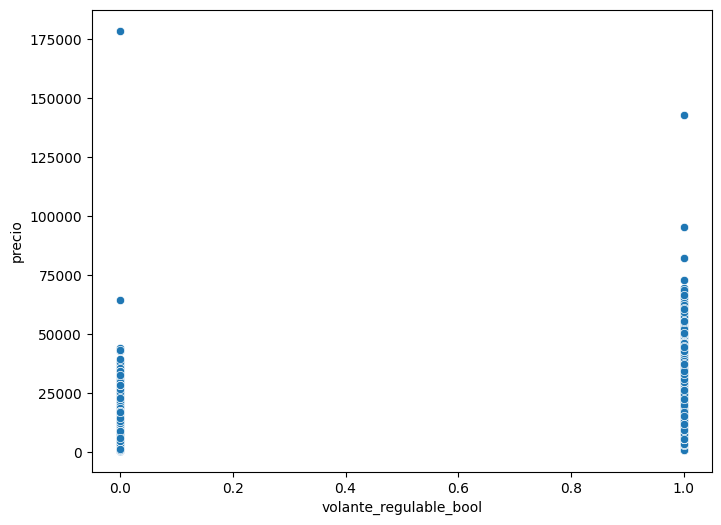

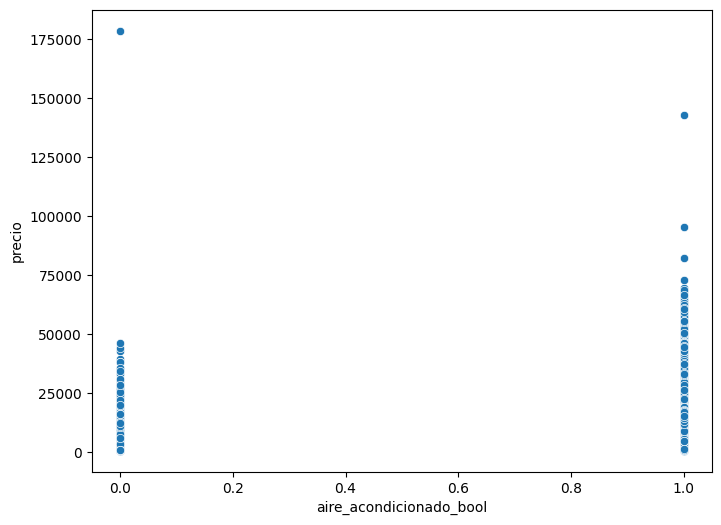

In [ ]:
variables_x = ['km', 'potencia', 'color', 'tipo_gasolina', 'tipo_coche', 'fecha_dif_anyo',
               'volante_regulable_bool', 'aire_acondicionado_bool']

for variable_x in variables_x:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=variable_x, y='precio', data=df_bmw3)

In [ ]:
df_bmw4=df_bmw3.copy()

## ENCODE THE FEATURES

### One Hot Encoder

In [ ]:
df_bmw4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,fecha_dif_anyo,volante_regulable_bool,aire_acondicionado_bool,camara_trasera_bool,elevalunas_electrico_bool,bluetooth_bool,gps_bool,alerta_lim_velocidad_bool,log_precio
0,118,140411.0,100.0,diesel,black,sin_tipo,11300.0,5.916617,1,1,0,1,0,1,1,4.053078
1,M4,13929.0,317.0,petrol,grey,convertible,69700.0,99.000000,1,1,0,0,1,1,1,4.843233
2,320,183297.0,120.0,diesel,white,sin_tipo,10200.0,5.837218,0,0,0,1,0,1,0,4.008600
3,420,128035.0,135.0,diesel,red,convertible,25100.0,99.000000,1,1,0,1,1,1,1,4.399674
4,425,97097.0,160.0,diesel,silver,sin_tipo,33400.0,99.000000,1,1,0,0,1,1,1,4.523746


In [ ]:
df_bmw4['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', '114', '520 Gran Turismo', '530 Gran Turismo',
       'i3', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [ ]:
grupos_modelos = {
    'serie1': ['118', '120', '116', '123', '125', '114', '135'],
    'serie2': ['218','225', '220', '216', '214', '218 Active Tourer', '218 Gran Tourer', '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer','225 Active Tourer', '214 Gran Tourer'],
    'serie3': ['316','318', '320', '325','330', '335', '328', '320 Gran Turismo', '318 Gran Turismo', '330 Gran Turismo', '335 Gran Turismo', '325 Gran Turismo'],
    'serie4': ['420', '428', '435', '418', '425', '430', '435 Gran Coupé','430 Gran Coupé', '420 Gran Coupé', '418 Gran Coupé'],
    'serie5': ['520', '525', '530', '535','518','523', '528', '523', '528', '520 Gran Turismo', '530 Gran Turismo', '535 Gran Turismo'],
    'serie6': ['650','640','630', '635', '640 Gran Coupé'],
    'serie7': ['730','740', '750', '735'],
    'serie_x': ['X1', 'X3', 'X4', 'X5', 'X6', 'X5 M', 'X6 M', 'X5 M50'],
    'serie_m': ['M4', 'M3', 'M235', 'M550', 'M135', 'M5'],
    'hibrido_electrico': ['i8', 'i3', 'ActiveHybrid 5', 'Z4', ' Active Tourer']}

In [ ]:
df_bmw4['grupo_modelo'] = df_bmw4['modelo'].apply(lambda x: next((grupo for grupo, modelos in grupos_modelos.items() if x in modelos), x))

In [ ]:
df_bmw4['grupo_modelo'].unique()

array(['serie1', 'serie_m', 'serie3', 'serie4', 'hibrido_electrico',
       'serie2', 'serie6', 'serie5', 'serie_x', 'serie7'], dtype=object)

In [ ]:
df_bmw4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,fecha_dif_anyo,volante_regulable_bool,aire_acondicionado_bool,camara_trasera_bool,elevalunas_electrico_bool,bluetooth_bool,gps_bool,alerta_lim_velocidad_bool,log_precio,grupo_modelo
0,118,140411.0,100.0,diesel,black,sin_tipo,11300.0,5.916617,1,1,0,1,0,1,1,4.053078,serie1
1,M4,13929.0,317.0,petrol,grey,convertible,69700.0,99.000000,1,1,0,0,1,1,1,4.843233,serie_m
2,320,183297.0,120.0,diesel,white,sin_tipo,10200.0,5.837218,0,0,0,1,0,1,0,4.008600,serie3
3,420,128035.0,135.0,diesel,red,convertible,25100.0,99.000000,1,1,0,1,1,1,1,4.399674,serie4
4,425,97097.0,160.0,diesel,silver,sin_tipo,33400.0,99.000000,1,1,0,0,1,1,1,4.523746,serie4


In [ ]:
del df_bmw4['modelo']

In [ ]:
target=['precio', 'log_precio']
lnum2, lbool2, lcat2 = obtener_lista_variables(df_bmw4)

In [ ]:
lnum2

['km', 'potencia', 'fecha_dif_anyo']

In [ ]:
lcat2

['tipo_gasolina', 'color', 'tipo_coche', 'grupo_modelo']

In [ ]:
## we are transforming the remaining categorical variables into columns of 0 and 1 (tipo_gasolina, color y tipo_coche)
df_bmw4=pd.get_dummies(data=df_bmw4, columns=lcat2)

In [ ]:
df_bmw4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   km                              4804 non-null   float64
 1   potencia                        4804 non-null   float64
 2   precio                          4804 non-null   float64
 3   fecha_dif_anyo                  4804 non-null   float64
 4   volante_regulable_bool          4804 non-null   int8   
 5   aire_acondicionado_bool         4804 non-null   int8   
 6   camara_trasera_bool             4804 non-null   int8   
 7   elevalunas_electrico_bool       4804 non-null   int8   
 8   bluetooth_bool                  4804 non-null   int8   
 9   gps_bool                        4804 non-null   int8   
 10  alerta_lim_velocidad_bool       4804 non-null   int8   
 11  log_precio                      4804 non-null   float64
 12  tipo_gasolina_diesel            48

In [ ]:
df_bmw4.head()

,km,potencia,precio,fecha_dif_anyo,volante_regulable_bool,aire_acondicionado_bool,camara_trasera_bool,elevalunas_electrico_bool,bluetooth_bool,gps_bool,...,grupo_modelo_hibrido_electrico,grupo_modelo_serie1,grupo_modelo_serie2,grupo_modelo_serie3,grupo_modelo_serie4,grupo_modelo_serie5,grupo_modelo_serie6,grupo_modelo_serie7,grupo_modelo_serie_m,grupo_modelo_serie_x
0,140411.0,100.0,11300.0,5.916617,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,13929.0,317.0,69700.0,99.000000,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,183297.0,120.0,10200.0,5.837218,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,128035.0,135.0,25100.0,99.000000,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
4,97097.0,160.0,33400.0,99.000000,1,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
corr = df_bmw4.corr()
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,precio,fecha_dif_anyo,volante_regulable_bool,aire_acondicionado_bool,camara_trasera_bool,elevalunas_electrico_bool,bluetooth_bool,gps_bool,alerta_lim_velocidad_bool,log_precio,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_sin_color,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin_tipo,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,grupo_modelo_hibrido_electrico,grupo_modelo_serie1,grupo_modelo_serie2,grupo_modelo_serie3,grupo_modelo_serie4,grupo_modelo_serie5,grupo_modelo_serie6,grupo_modelo_serie7,grupo_modelo_serie_m,grupo_modelo_serie_x
km,1.000000,-0.042286,-0.410005,0.018265,0.073476,0.028424,0.004883,0.052374,-0.027652,0.157125,-0.029729,-0.439017,0.052278,-0.038520,-0.043660,-0.040548,-0.008633,0.037458,-0.023989,-0.019944,0.043657,0.028098,-0.031321,-0.025421,0.025351,-0.000227,-0.066413,-0.033888,-0.051026,0.140516,-0.097590,0.061198,-0.003622,-0.030095,-0.089743,-0.071288,-0.060766,-0.122135,-0.129313,0.111924,-0.142614,0.172188,-0.033391,0.002864,-0.032807,-0.112142
potencia,-0.042286,1.000000,0.639993,-0.016745,0.325615,0.179865,0.313306,0.341674,0.202501,0.007580,0.427566,0.533474,-0.130481,-0.024100,0.061445,0.125350,-0.020405,0.033308,-0.009596,-0.055438,-0.016783,0.003528,0.011401,-0.009546,0.012152,-0.005766,0.006152,0.020934,0.106963,-0.043586,-0.178923,0.030723,-0.011953,-0.135134,0.196562,-0.038442,-0.006060,-0.324771,-0.058300,-0.294289,0.055175,0.206651,0.203634,0.193139,0.300290,0.238567
precio,-0.410005,0.639993,1.000000,-0.033796,0.265212,0.221263,0.252218,0.261576,0.182798,-0.008458,0.386157,0.838040,0.006007,0.013886,0.109164,-0.027815,-0.009308,0.024811,-0.022855,-0.009550,-0.052857,-0.013324,0.011529,0.008249,-0.026188,-0.009222,0.051530,0.007913,0.089481,-0.166083,-0.094757,0.013165,-0.017927,-0.085780,0.279243,-0.009106,0.033592,-0.233113,0.009356,-0.308000,0.148639,0.058879,0.144208,0.147884,0.167211,0.327055
fecha_dif_anyo,0.018265,-0.016745,-0.033796,1.000000,0.002196,-0.037184,-0.000811,-0.006289,-0.009542,-0.020064,-0.023538,-0.040491,-0.018720,-0.008750,0.011426,0.018190,0.002094,-0.016696,0.003457,0.009059,-0.003074,0.011395,0.011583,0.010307,0.004243,0.000734,-0.010158,0.023579,-0.005007,-0.007048,0.032766,-0.005829,-0.009992,0.018001,-0.011419,0.006344,0.004043,0.027720,0.020535,-0.001516,0.011607,-0.027864,0.013048,-0.007468,0.016136,-0.004117
volante_regulable_bool,0.073476,0.325615,0.265212,0.002196,1.000000,0.286739,0.254029,0.277848,0.123863,0.243783,0.190321,0.251124,0.003524,0.005782,0.031882,-0.010156,-0.025902,0.025214,0.012957,0.038644,0.009918,0.051480,0.008180,-0.033706,-0.015766,-0.025607,-0.102928,0.044903,0.026453,0.002414,-0.116718,0.059754,-0.024401,-0.091571,0.081991,-0.027002,0.038906,-0.244315,-0.066774,-0.206215,0.045684,0.272039,0.070261,0.092158,0.043687,0.102398
aire_acondicionado_bool,0.028424,0.179865,0.221263,-0.037184,0.286739,1.000000,0.143191,0.259191,0.101758,0.346274,0.171171,0.313818,0.078607,0.011830,0.001491,-0.082184,0.010900,0.042772,0.003043,0.047152,-0.024353,0.022926,0.001491,-0.045948,-0.036028,-0.046492,-0.049829,-0.037662,-0.038038,0.078951,-0.069764,0.062827,-0.024704,-0.106793,-0.010971,0.009078,-0.027166,-0.205108,0.005174,-0.035601,0.009946,0.187557,0.016029,0.050457,0.005557,-0.009633
camara_trasera_bool,0.004883,0.313306,0.252218,-0.000811,0.254029,0.143191,1.000000,0.198537,0.125812,0.061394,0.168229,0.206640,-0.013432,-0.012590,-0.003139,0.015930,-0.020663,0.021906,0.001084,-0.017300,0.011221,0.014624,-0.017810,-0.023740,0.000705,-0.031718,0.002546,-0.033347,0.030623,-0.036740,-0.033220,-0.011740,0.004544,-0.043650,0.091044,-0.012493,-0.016261,-0.104076,-0.020185,-0.153983,-0.002292,0.099401,0.094534,0.128151,0.033471,0.109947
elevalunas_electrico_bool,0.052374,0.341674,0.261576,-0.006289,0.2

### Minmaxscaler

In [ ]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_bmw4[variable_transformar]=minMaxResultado.fit_transform(df_bmw4[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [ ]:
for i in lnum:
  print(i)

km
potencia
fecha_dif_anyo


In [ ]:
for i in lnum:
  globals()[f"minMax_{i}"] = minmaxTransformacion(i)

In [ ]:
df_bmw4.head()

,km,potencia,precio,fecha_dif_anyo,volante_regulable_bool,aire_acondicionado_bool,camara_trasera_bool,elevalunas_electrico_bool,bluetooth_bool,gps_bool,...,grupo_modelo_hibrido_electrico,grupo_modelo_serie1,grupo_modelo_serie2,grupo_modelo_serie3,grupo_modelo_serie4,grupo_modelo_serie5,grupo_modelo_serie6,grupo_modelo_serie7,grupo_modelo_serie_m,grupo_modelo_serie_x
0,0.289039,0.095238,11300.0,0.054140,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0.027787,0.703081,69700.0,1.000000,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0.377621,0.151261,10200.0,0.053333,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0.263476,0.193277,25100.0,1.000000,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0.199573,0.263305,33400.0,1.000000,1,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


## CORRELATION Y VARIANCE

In [ ]:
df_bmw_final=df_bmw4.copy()

In [ ]:
del df_bmw_final['log_precio']

In [ ]:
target = 'precio'
features = df_bmw_final.columns[df_bmw_final.columns!=target]

X = df_bmw_final[features]
y = df_bmw_final[target]

In [ ]:
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    #Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
    Z.loc[Z['corr_F1_target'] < Z['corr_F2_target'], 'F_to_delete'] = Z.loc[Z['corr_F1_target'] < Z['corr_F2_target'], 'F1']

    return Z

highly_corr = highly_correlated(X,y,0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,tipo_gasolina_petrol,tipo_gasolina_diesel,0.975938,0.027815,0.006007,tipo_gasolina_diesel


In [ ]:
# permite saber qué variable está menos correlacionada con el target
list(highly_corr['F_to_delete'])

['tipo_gasolina_diesel']

In [ ]:
del df_bmw_final['tipo_gasolina_diesel']

In [ ]:
# We eliminate constant columns (null variance)
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

11  low variance features were removed:
 ['tipo_gasolina_electro', 'tipo_gasolina_hybrid_petrol', 'color_beige', 'color_green', 'color_orange', 'color_red', 'tipo_coche_convertible', 'tipo_coche_van', 'grupo_modelo_hibrido_electrico', 'grupo_modelo_serie6', 'grupo_modelo_serie_m']


<ipython-input-208-ec020bc1b818>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=cols_lowvar,inplace=True)


In [ ]:
columna_drop=['tipo_gasolina_electro', 'tipo_gasolina_hybrid_petrol', 'color_beige', 'color_green', 'color_orange', 'color_red', 'tipo_coche_convertible', 'tipo_coche_van', 'grupo_modelo_hibrido_electrico', 'grupo_modelo_serie6', 'grupo_modelo_serie_m']
df_bmw_final.drop(columns=columna_drop, inplace=True)

In [ ]:
df_bmw_final.shape

(4804, 33)

In [ ]:
df_bmw_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   km                         4804 non-null   float64
 1   potencia                   4804 non-null   float64
 2   precio                     4804 non-null   float64
 3   fecha_dif_anyo             4804 non-null   float64
 4   volante_regulable_bool     4804 non-null   int8   
 5   aire_acondicionado_bool    4804 non-null   int8   
 6   camara_trasera_bool        4804 non-null   int8   
 7   elevalunas_electrico_bool  4804 non-null   int8   
 8   bluetooth_bool             4804 non-null   int8   
 9   gps_bool                   4804 non-null   int8   
 10  alerta_lim_velocidad_bool  4804 non-null   int8   
 11  tipo_gasolina_petrol       4804 non-null   uint8  
 12  color_black                4804 non-null   uint8  
 13  color_blue                 4804 non-null   uint8